# Cognizant Artificial Intelligence Project

**Briefing**

The client is *Gala Groceries* - an innovative grocery store that utilizes technology to its maximum potential. 

They have issues with supply chain and the task of this analysis is to help them understand how to stock their items better

## Part 1. EDA

 

In this part we'll conduct an exploratory data analysis in hopes of gaining valuable insights. Firstly, we'll load the data

In [1]:
import pandas as pd

sales_data = pd.read_csv("data/sample_sales_data.csv")
sales_data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [2]:
# dropping the index column
sales_data = sales_data.drop(columns=["Unnamed: 0"])
sales_data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


First and foremost, some descriptive statistics and basic dataset info

In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [4]:
sales_data.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [5]:
sales_data.describe(include=["O"])

,transaction_id,timestamp,product_id,category,customer_type,payment_type
count,7829,7829,7829,7829,7829,7829
unique,7829,7738,300,22,5,4
top,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 19:32:20,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,cash
freq,1,2,114,998,1601,2027


No null values, normal statistics, a lot of categories, among which are ids and timestamps (should be converted to datetime). The categories that are not ids or datetime are not highly cardinal, so they should not be difficult to deal with

Now we'll visualize each column more meticulously. Starting with numerical data.

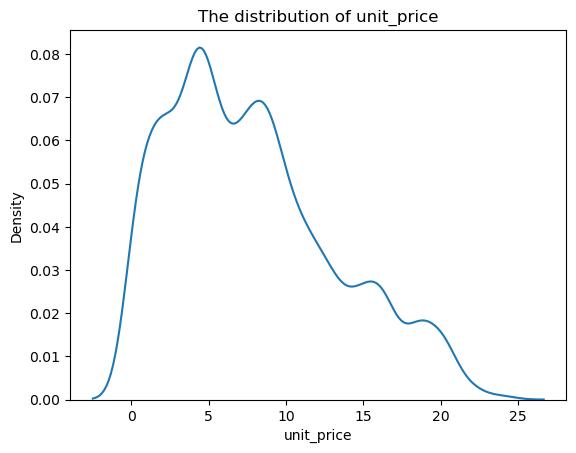

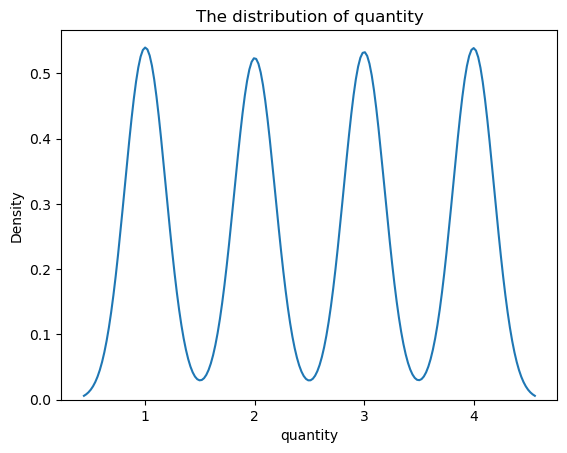

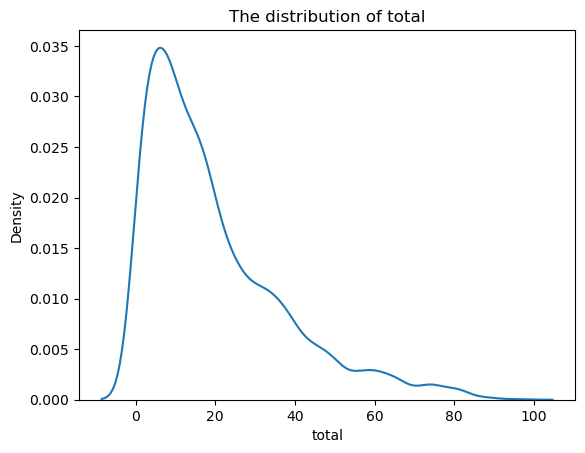

In [6]:
# distribution

import seaborn as sns
import matplotlib.pyplot as plt

column_names = ["unit_price", "quantity", "total"]
for column in column_names:
    sns.kdeplot(data=sales_data, x=column)
    plt.title(f"The distribution of {column}")
    plt.show()

Unit price is normally distributed, but is a little bit skewed with minor peaks. 

Quantity looks like multimodal distribution, where each value occurs roughly at the same frequency.

Total is similar to unit price but smoother

Let's see if they are correlated

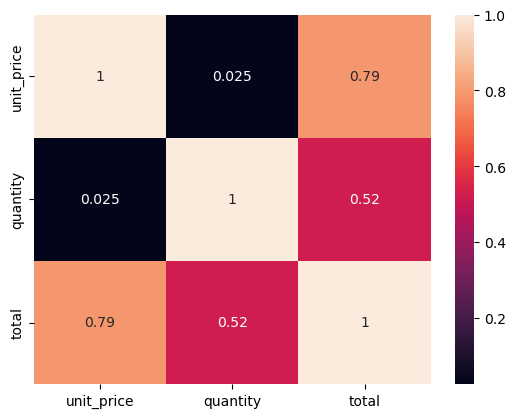

In [7]:
sns.heatmap(sales_data[["unit_price", "quantity", "total"]].corr(), annot=True)
plt.show()

Looking at the data and the plot, we can see that they are higly correlated

total = unit_price * quantity, to be exact. An obvious case of linear relationship

Now let's visualize the following categories: category (of products), customer_type and payment_type.

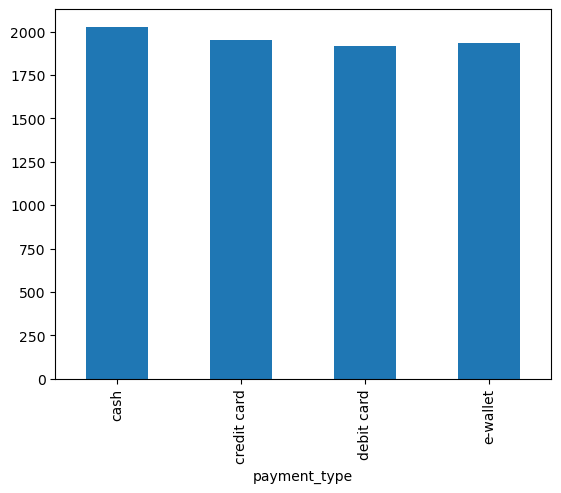

In [8]:
# payment type

payment_data = sales_data.groupby("payment_type")["transaction_id"].count()
payment_data.plot.bar()
plt.show()

Cash is more popular than everything else by a small margin, credit cards come very close, debit cards and e-wallets are approximately the same

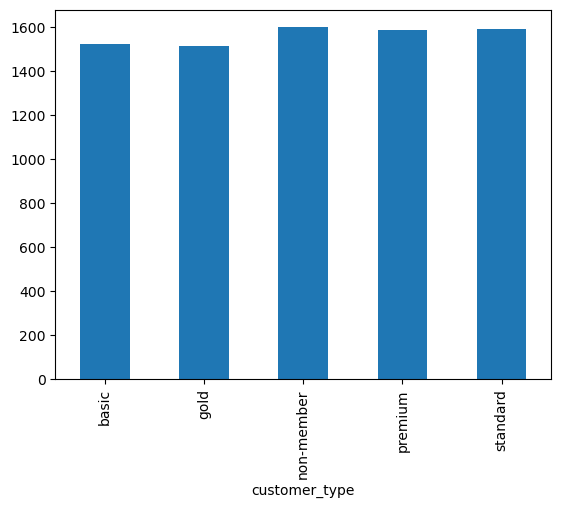

In [9]:
# customer_type

customer_data = sales_data.groupby("customer_type")["transaction_id"].count()
customer_data.plot.bar()
plt.show()

The top-3 is pretty logical:
- non-member
- standard
- premium

Basic and gold are quite the same, not sure where to put them in the hierarchy though

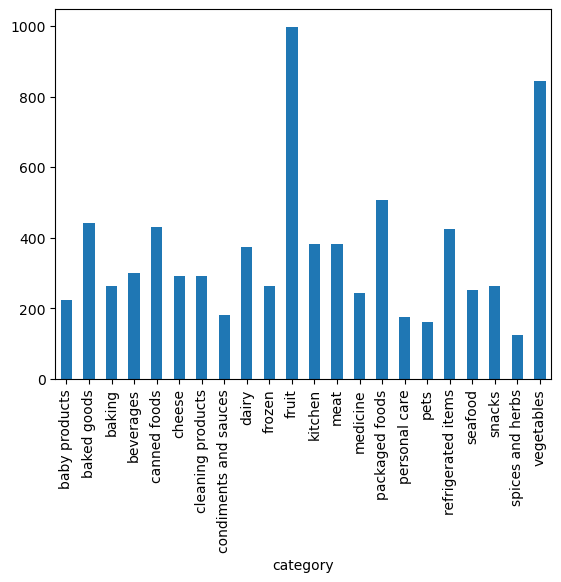

In [10]:
# goods' categories

goods_data = sales_data.groupby("category")["transaction_id"].count()
goods_data.plot.bar()
plt.show()

Fruits and vegetables are the most popular categories of products, then come packaged/refrigerated/canned foods, then baked goods, dairy.

The least bought categories are spices and herbs, pets, personal care, condiments and sauces, and baby products

### Summary

Does the data answer the client's question? No, absolutely not. Either the question is too broad, or the data is too vague.

My recommendattions:
- get more data: both in terms of rows and columns
- the client should make his problem more specific so that it's solvable

## Part 2. Data preprocessing

The client provided additional datasets. We'll load them, aggregate as needed, and merge them. Let's begin

In [11]:
sales_df = pd.read_csv("data/sales.csv", parse_dates=["timestamp"]).drop(columns=["Unnamed: 0"])
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [13]:
stock_df = pd.read_csv("data/sensor_stock_levels.csv", parse_dates=["timestamp"]).drop(columns=["Unnamed: 0"])
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [14]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [15]:
temp_df = pd.read_csv("data/sensor_storage_temperature.csv", parse_dates=["timestamp"]).drop(columns=["Unnamed: 0"])
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [16]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


The client rephrased the question a little bit

***Can we accurately predict the stock levels of products, based on sales data and sensor data, 
on an hourly basis in order to more intelligently procure products from our suppliers?***

So we need to work with timestamps a little before aggregating and merging. We'll have to remove seconds and minutes, so that only date and hours remain. We must not add hours when doing this. In other words, we need to "floor" the timestamps

In [17]:
# for sales
sales_df["timestamp"] = sales_df["timestamp"].dt.floor("H")
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [18]:
# for stock
stock_df["timestamp"] = stock_df["timestamp"].dt.floor("H")
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [19]:
# for temperature
temp_df["timestamp"] = temp_df["timestamp"].dt.floor("H")
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Time for aggregation

For quantity we'll use sum, for temperature and stock pct - mean

In [20]:
# quantity

quantity_data = sales_df.groupby(["timestamp", "product_id"])["quantity"].sum().reset_index()
quantity_data

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11
...,...,...,...
6212,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3
6213,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3
6214,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,2
6215,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,1


In [21]:
# temperature

temp_data = temp_df.groupby("timestamp")["temperature"].mean().reset_index()
temp_data

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734
...,...,...
72,2022-03-07 15:00:00,-0.943848
73,2022-03-07 16:00:00,-0.230631
74,2022-03-07 17:00:00,-0.003988
75,2022-03-07 18:00:00,0.409693


In [22]:
# stock

stock_data = stock_df.groupby(["timestamp", "product_id"])["estimated_stock_pct"].mean().reset_index()
stock_data

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05
...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92


Time to merge

In [23]:
stock_sales_data = pd.merge(left=stock_data, right=quantity_data, how="left", on=['timestamp', 'product_id'])
stock_sales_data.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [24]:
stock_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 423.6+ KB


NaN quality means 0 in this case, so we'll fill nan values with zeros

In [25]:
stock_sales_data.fillna(0, inplace=True)
stock_sales_data.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0


In [26]:
# merging with temp
feature_data = pd.merge(left=stock_sales_data, right=temp_data, how="left", on="timestamp")
feature_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885


In [27]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


Everything is fine, but we'll take two useful features from sales dataset: category and unit_price

In [28]:
category_data = sales_df[["product_id", "category"]].drop_duplicates()
unit_price_data = sales_df[["product_id", "unit_price"]].drop_duplicates()

In [29]:
category_data.head()

,product_id,category
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit


In [30]:
unit_price_data.head()

,product_id,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,4.49


In [31]:
feature_data = feature_data.merge(category_data, how="left", on="product_id")
feature_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [32]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 593.1+ KB


In [33]:
feature_data = feature_data.merge(unit_price_data, how="left", on="product_id")
feature_data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [34]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


## Part 3. Feature engineering

There is not so much to engineer: extract days and hours from timestamp and encode categories

In [35]:
# extracting days and hours
feature_data["day_of_month"] = feature_data["timestamp"].dt.day
feature_data["day_of_week"] = feature_data["timestamp"].dt.day_of_week
feature_data["hour"] = feature_data["timestamp"].dt.hour
feature_data = feature_data.drop(columns=["timestamp"])
feature_data.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day_of_month,day_of_week,hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


In [36]:
# encoding categories
categories_encoded = pd.get_dummies(feature_data["category"], prefix="category_")
categories_encoded

,category__baby products,category__baked goods,category__baking,category__beverages,category__canned foods,category__cheese,category__cleaning products,category__condiments and sauces,category__dairy,category__frozen,...,category__meat,category__medicine,category__packaged foods,category__personal care,category__pets,category__refrigerated items,category__seafood,category__snacks,category__spices and herbs,category__vegetables
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10841,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10842,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10843,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
feature_data = pd.concat([feature_data, categories_encoded], axis=1)
feature_data.drop(columns=["category"], inplace=True)
feature_data.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,hour,category__baby products,category__baked goods,...,category__meat,category__medicine,category__packaged foods,category__personal care,category__pets,category__refrigerated items,category__seafood,category__snacks,category__spices and herbs,category__vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_id                       10845 non-null  object 
 1   estimated_stock_pct              10845 non-null  float64
 2   quantity                         10845 non-null  float64
 3   temperature                      10845 non-null  float64
 4   unit_price                       10845 non-null  float64
 5   day_of_month                     10845 non-null  int64  
 6   day_of_week                      10845 non-null  int64  
 7   hour                             10845 non-null  int64  
 8   category__baby products          10845 non-null  uint8  
 9   category__baked goods            10845 non-null  uint8  
 10  category__baking                 10845 non-null  uint8  
 11  category__beverages              10845 non-null  uint8  
 12  category__canned f

The only thing that remains is to delete the product_id column and we are good to go

In [39]:
feature_data = feature_data.drop(columns=["product_id"])
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   estimated_stock_pct              10845 non-null  float64
 1   quantity                         10845 non-null  float64
 2   temperature                      10845 non-null  float64
 3   unit_price                       10845 non-null  float64
 4   day_of_month                     10845 non-null  int64  
 5   day_of_week                      10845 non-null  int64  
 6   hour                             10845 non-null  int64  
 7   category__baby products          10845 non-null  uint8  
 8   category__baked goods            10845 non-null  uint8  
 9   category__baking                 10845 non-null  uint8  
 10  category__beverages              10845 non-null  uint8  
 11  category__canned foods           10845 non-null  uint8  
 12  category__cheese  

## Part 4. Modelling

For this task, we'll compare several regression models:
- linear regression (classic)
- random forest regression (task suggestion)
- gradient boosting regression (personal favourite)

Also the metrics that will be used:
- MAE - average deviation between predicted and actual outcomes. The closer to 0, the better
- RMSE - standard deviation of the errors between predicted and actual values. The closer to 0, the better
- R^2 - proportion of the target's variance explained by the model. The closer to 1, the better

By the way, the data needs to be standardized because features are measured differntly.

And we will use cross-validation technique for more robust testing

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

y = feature_data["estimated_stock_pct"]
X = feature_data.drop(columns=["estimated_stock_pct"])

ss = StandardScaler()
X_st = ss.fit_transform(X)

lr = LinearRegression()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [41]:
# linear regression
res = cross_validate(lr, X_st, y, scoring=("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"), return_train_score=True)
for i in res:
    if i!="fit_time" and i!="score_time":
        print(f"{i}: {res[i].mean()}")

test_neg_mean_absolute_error: -10487926276.126133
train_neg_mean_absolute_error: -0.22211938150548266
test_neg_root_mean_squared_error: -12272747899.114502
train_neg_root_mean_squared_error: -0.2641086644956273
test_r2: -1.0725094941077262e+22
train_r2: 0.0030062448615419957


In [42]:
# random forest regressor
res = cross_validate(rfr, X_st, y, scoring=("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"), return_train_score=True)
for i in res:
    if i!="fit_time" and i!="score_time":
        print(f"{i}: {res[i].mean()}")

test_neg_mean_absolute_error: -0.22981620846121759
train_neg_mean_absolute_error: -0.09432508209954991
test_neg_root_mean_squared_error: -0.2758960678701367
train_neg_root_mean_squared_error: -0.11753778436216025
test_r2: -0.08804707217262116
train_r2: 0.8025379750834745


In [43]:
# gradient booster regressor
res = cross_validate(gbr, X_st, y, scoring=("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"), return_train_score=True)
for i in res:
    if i!="fit_time" and i!="score_time":
        print(f"{i}: {res[i].mean()}")

test_neg_mean_absolute_error: -0.22299692404434812
train_neg_mean_absolute_error: -0.21791559306617736
test_neg_root_mean_squared_error: -0.26554549951829176
train_neg_root_mean_squared_error: -0.25925820755723616
test_r2: -0.007946362606673585
train_r2: 0.03929069657265658


In [44]:
stock_data.describe()

,estimated_stock_pct
count,10845.000000
mean,0.505130
std,0.264519
min,0.010000
25%,0.300000
50%,0.500000
75%,0.715000
max,1.000000


Logistic regression did beyond horribly. Random forest and gradient boosting have approximately the same results, the former being overfitted (train errors are lower than test errors) and the latter a little bit better across all scores/errors in general

The data and models definetely need improvement (MAE being almost half of the average, RMSE being roughly as std, and r^2 less than 0)

Now we'll see, which of our features played the most significant role in predicting the target value in the case of random forest regression

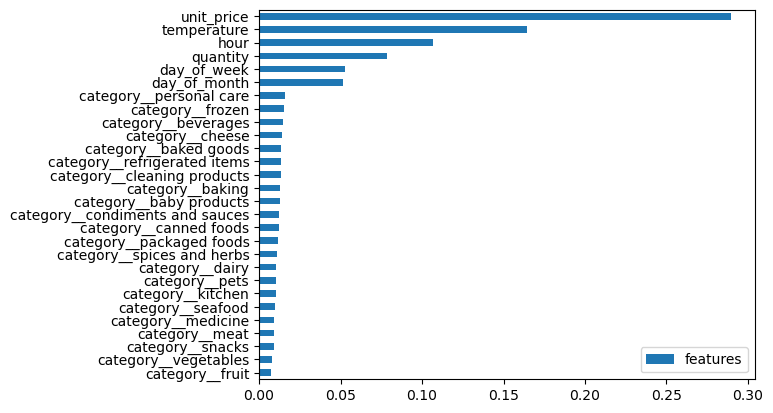

In [47]:
rfr.fit(X, y)
f_imp = rfr.feature_importances_
f_df = pd.DataFrame({"features":f_imp}, index=feature_data.columns[1:]).sort_values(by="features")
f_df.plot.barh()
plt.show()

Unit price, temperature and hour - these are the most important features for random forest.

### Summary

We can predict the stock percentage hourly using the data, but we cannot do it accurately yet. We need more data, feature engineering possibly and patience